Setup and Get Data

Collect image Using OpenCV

In [1]:
import os
import time
import uuid
import  cv2

In [2]:
data_path="C:\\Users\\91954\\OneDrive\\Desktop\\Deep\\Face Detection\\data"
images_path="C:\\Users\\91954\\OneDrive\\Desktop\\Deep\\Face Detection\\data\\images"
number_images=30
images_path

'C:\\Users\\91954\\OneDrive\\Desktop\\Deep\\Face Detection\\data\\images'

Review Dataset and Build Image Loading Function

In [3]:
import tensorflow as tf
import keras
import numpy as np
import json
import matplotlib.pyplot as plt

In [4]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
images=tf.data.Dataset.list_files('C:\\Users\\91954\\OneDrive\\Desktop\\Deep\\Face Detection\\data\\images\\*.jpg',shuffle=False)

In [6]:
images.as_numpy_iterator().next()

b'C:\\Users\\91954\\OneDrive\\Desktop\\Deep\\Face Detection\\data\\images\\00235cf3-21e1-11ef-adb5-088fc322a852.jpg'

In [7]:
def load_image(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img

In [8]:
images=images.map(load_image)

In [9]:
images.as_numpy_iterator().next()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [225, 225, 233],
        [225, 225, 233],
        [225, 225, 233]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [224, 224, 232],
        [224, 224, 232],
        [224, 224, 232]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [225, 224, 230],
        [225, 224, 230],
        [224, 223, 229]],

       ...,

       [[ 75,  71,  72],
        [ 71,  67,  66],
        [ 75,  71,  68],
        ...,
        [ 36,  36,  44],
        [ 37,  37,  45],
        [ 36,  39,  46]],

       [[ 72,  71,  69],
        [ 69,  68,  66],
        [ 74,  73,  68],
        ...,
        [ 38,  37,  45],
        [ 35,  38,  43],
        [ 35,  40,  44]],

       [[ 68,  68,  66],
        [ 68,  69,  64],
        [ 74,  73,  68],
        ...,
        [ 38,  37,  45],
        [ 35,  38,  43],
        [ 34,  39,  43]]

In [10]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

Partition Unaugmented Data

In [11]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join(data_path,folder,'images')):
        filename=file.split('.')[0]+'.json'
        existing_filepath=os.path.join(data_path,'labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath=os.path.join(data_path,folder,'labels',filename)
            os.replace(existing_filepath,new_filepath)

Apply Image Augmentation on images and Labels using Albumentations

In [12]:
import albumentations as alb

In [13]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [14]:
img = cv2.imread(os.path.join(data_path,'train', 'images','622a8359-21db-11ef-95d0-088fc322a852.jpg'))

In [15]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [216, 219, 210],
        [214, 220, 209],
        [214, 220, 209]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [216, 219, 210],
        [214, 219, 210],
        [214, 220, 209]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [215, 218, 209],
        [215, 218, 209],
        [215, 218, 209]],

       ...,

       [[ 96,  97,  95],
        [ 95,  98,  96],
        [ 98,  99,  95],
        ...,
        [102, 110, 117],
        [109, 117, 124],
        [115, 123, 130]],

       [[ 98,  97,  93],
        [ 97,  98,  94],
        [100,  99,  95],
        ...,
        [101, 111, 118],
        [108, 117, 126],
        [113, 122, 131]],

       [[ 95,  94,  90],
        [ 96,  95,  91],
        [ 98,  97,  93],
        ...,
        [101, 113, 119],
        [108, 117, 126],
        [112, 121, 130]]

In [16]:
with open(os.path.join(data_path, 'train', 'labels', '622a8359-21db-11ef-95d0-088fc322a852.json'), 'r') as f:
    label = json.load(f)

In [17]:
label['shapes'][0]['points']

[[239.04761904761907, 55.608465608465615],
 [509.4179894179895, 338.67724867724866]]

In [18]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [19]:
coords

[239.04761904761907, 55.608465608465615, 509.4179894179895, 338.67724867724866]

In [20]:
coords = list(np.divide(coords, [640,480,640,480]))

In [21]:
coords

[0.37351190476190477,
 0.1158509700176367,
 0.7959656084656086,
 0.7055776014109347]

In [22]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [23]:
augmented['bboxes'][0][2:]

(0.7332275132275132, 0.8897589653145208)

In [24]:
augmented['image'].shape

(450, 450, 3)

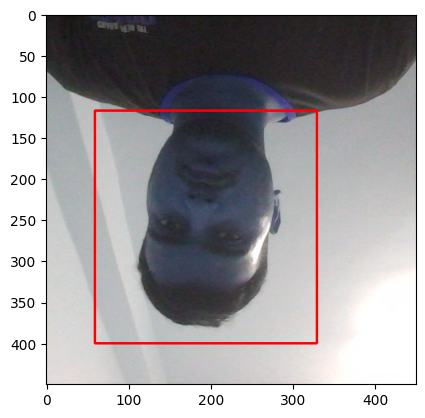

In [25]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

Build and Run Augmentation Pipeline

In [26]:
aug_data='C:\\Users\\91954\\OneDrive\\Desktop\\Deep\\Face Detection\\aug_data'
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join(data_path, partition, 'images')):
        img = cv2.imread(os.path.join(data_path, partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join(data_path, partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(5):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join(aug_data, partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
              

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join(aug_data, partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [27]:
train_images = tf.data.Dataset.list_files('C:\\Users\\91954\\OneDrive\\Desktop\\Deep\\Face Detection\\aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [28]:
test_images = tf.data.Dataset.list_files('C:\\Users\\91954\\OneDrive\\Desktop\\Deep\\Face Detection\\aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [29]:
val_images = tf.data.Dataset.list_files('C:\\Users\\91954\\OneDrive\\Desktop\\Deep\\Face Detection\\aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

Prepare Labels

In [30]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [31]:
train_labels = tf.data.Dataset.list_files('C:\\Users\\91954\\OneDrive\\Desktop\\Deep\\Face Detection\\aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [32]:
test_labels = tf.data.Dataset.list_files('C:\\Users\\91954\\OneDrive\\Desktop\\Deep\\Face Detection\\aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [33]:
val_labels = tf.data.Dataset.list_files('C:\\Users\\91954\\OneDrive\\Desktop\\Deep\\Face Detection\\aug_data\\test\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [34]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.496 , 0.294 , 0.9995, 0.842 ], dtype=float16))

Combine Label

In [35]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(290, 290, 200, 200, 85, 200)

Final Database

In [36]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [37]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(4000)
test = test.batch(8)
test = test.prefetch(4)

In [38]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(3000)
val = val.batch(8)
val = val.prefetch(4)

In [39]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.1127 , 0.7686 , 0.1221 , 0.787  ],
        [0.1792 , 0.3752 , 0.6484 , 0.9185 ],
        [0.     , 0.3765 , 0.5024 , 0.9844 ],
        [0.     , 0.     , 0.523  , 0.5605 ],
        [0.0938 , 0.04346, 0.7266 , 0.642  ],
        [0.165  , 0.     , 0.6367 , 0.504  ],
        [0.47   , 0.3196 , 0.937  , 0.893  ],
        [0.5303 , 0.307  , 1.     , 0.9204 ]], dtype=float16))

In [40]:
data_samples = train.as_numpy_iterator()

In [41]:
res = data_samples.next()

Deep Learning Model

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [43]:
vgg=VGG16(include_top=False)

In [44]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [45]:
facetracker=build_model()

In [46]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [47]:
X,y=train.as_numpy_iterator().next()

In [48]:
classes,coords=facetracker.predict(X)

1/1 [==============================] - 1s 1s/step


In [49]:
classes,coords

(array([[0.60246694],
        [0.5560511 ],
        [0.58798   ],
        [0.59504086],
        [0.51346505],
        [0.5601074 ],
        [0.5955107 ],
        [0.56694055]], dtype=float32),
 array([[0.32871214, 0.33557048, 0.43490347, 0.335495  ],
        [0.37280324, 0.36042222, 0.3279725 , 0.39747733],
        [0.46318892, 0.34446397, 0.41396296, 0.3480031 ],
        [0.43495452, 0.3077471 , 0.44191027, 0.32967922],
        [0.41960207, 0.3640107 , 0.3940229 , 0.32347003],
        [0.36842555, 0.3528089 , 0.35959628, 0.30818817],
        [0.4155658 , 0.4655496 , 0.43622276, 0.31362402],
        [0.3534039 , 0.35427627, 0.34531102, 0.41775572]], dtype=float32))

In [50]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [51]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [52]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [53]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [54]:
classloss(y[0],classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5594801>

Train Neural Network

In [55]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [56]:
model = FaceTracker(facetracker)

In [57]:
model.compile(opt, classloss, regressloss)

In [58]:
logdir='logs'

In [59]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [60]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
37/37 [==============================] - 68s 2s/step - total_loss: 0.7593 - class_loss: 0.0512 - regress_loss: 0.7337 - val_total_loss: 1.8732 - val_class_loss: 1.3371 - val_regress_loss: 1.2046
Epoch 2/10
37/37 [==============================] - 60s 2s/step - total_loss: 0.3233 - class_loss: 3.4761e-04 - regress_loss: 0.3231 - val_total_loss: 0.3115 - val_class_loss: 6.4947e-05 - val_regress_loss: 0.3115
Epoch 3/10
37/37 [==============================] - 77s 2s/step - total_loss: 0.2232 - class_loss: 1.4415e-04 - regress_loss: 0.2231 - val_total_loss: 3.5135 - val_class_loss: 3.9007 - val_regress_loss: 1.5632
Epoch 4/10
37/37 [==============================] - 91s 2s/step - total_loss: 0.1834 - class_loss: 1.1391e-04 - regress_loss: 0.1834 - val_total_loss: 1.7530 - val_class_loss: 1.5016 - val_regress_loss: 1.0022
Epoch 5/10
37/37 [==============================] - 124s 3s/step - total_loss: 0.1458 - class_loss: 8.8876e-05 - regress_loss: 0.1457 - val_total_loss: 1.9574 -

In [61]:
hist.history

{'total_loss': [0.04475652426481247,
  0.016193769872188568,
  0.04771657660603523,
  0.0123231690376997,
  0.01144221518188715,
  0.011843686923384666,
  0.014967778697609901,
  0.005373743362724781,
  0.015554104931652546,
  0.005618182942271233],
 'class_loss': [0.0006276486092247069,
  3.1799670978216454e-05,
  5.835472256876528e-05,
  0.00015483525930903852,
  7.120112422853708e-05,
  1.1622978490777314e-05,
  4.714840179076418e-05,
  4.154531052336097e-05,
  1.4752259630768094e-05,
  3.457079628788051e-06],
 'regress_loss': [0.04444269835948944,
  0.016177870333194733,
  0.04768740013241768,
  0.012245750986039639,
  0.011406614445149899,
  0.011837875470519066,
  0.01494420412927866,
  0.00535297067835927,
  0.015546728856861591,
  0.005616454407572746],
 'val_total_loss': [1.8731778860092163,
  0.31154972314834595,
  3.513549566268921,
  1.7529749870300293,
  1.9574271440505981,
  0.41264742612838745,
  3.6641364097595215,
  2.227970600128174,
  0.6396275758743286,
  0.85846889

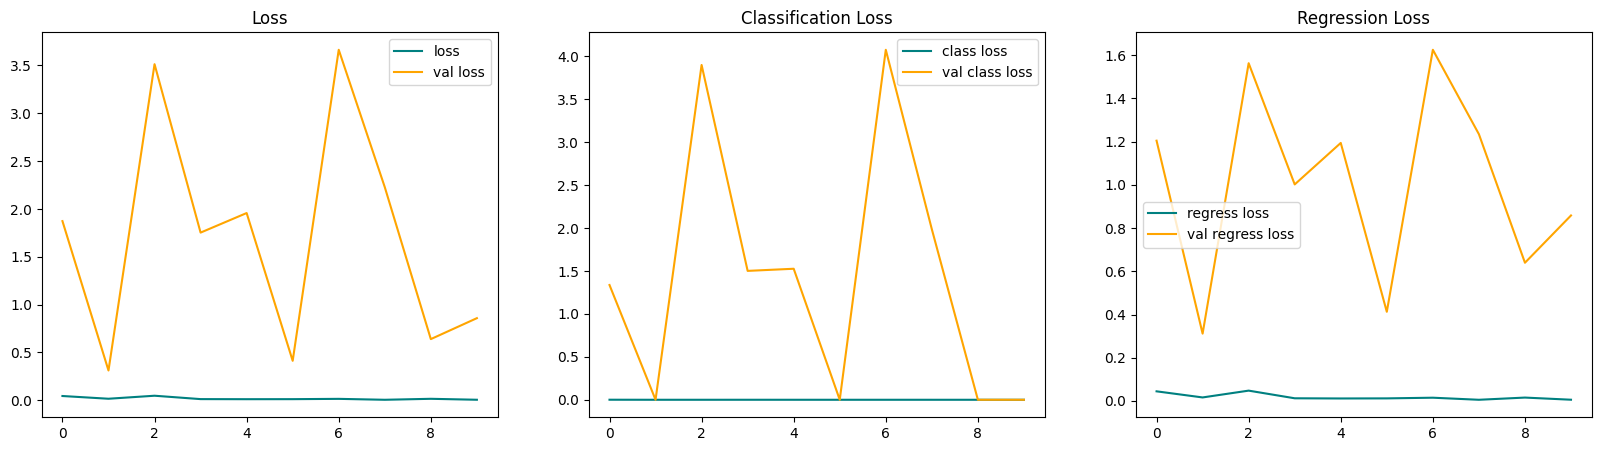

In [62]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [63]:
test_data = test.as_numpy_iterator()

In [64]:
test_sample = test_data.next()

In [65]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 532ms/step


In [66]:
yhat

[array([[0.9999823 ],
        [0.99994534],
        [0.99996495],
        [0.99999774],
        [0.9999979 ],
        [0.9999853 ],
        [0.99999654],
        [0.99999833]], dtype=float32),
 array([[0.04248664, 0.1463013 , 0.60713196, 0.6852263 ],
        [0.46109873, 0.3190192 , 0.9293014 , 0.8770888 ],
        [0.21510363, 0.30012834, 0.72375286, 0.8287816 ],
        [0.03293693, 0.3665014 , 0.5656974 , 0.9490093 ],
        [0.02774576, 0.421288  , 0.4594625 , 0.9520073 ],
        [0.4557099 , 0.24230073, 0.94981647, 0.8850225 ],
        [0.05172718, 0.44379926, 0.46298292, 0.936615  ],
        [0.27290204, 0.02608428, 0.76782954, 0.52086234]], dtype=float32)]

In [67]:
from tensorflow.keras.models import load_model

In [68]:
facetracker.save('facetracker.h5')

In [69]:
facetracker = load_model('facetracker.h5')

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()